# Pytorch 

1. **Tensor**

References: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html



Tensor trên pytorch tương tự như numpy
tensor của pytorch cũng giống với tensorflow

**khác nhau**: không cần phải truyền code vào trong 1 session để tạo tensor như tensorflow

In [2]:
from __future__ import print_function 
import torch 
#khởi tạo 1 matrix rỗng
x = torch.empty(5,3)
print(x)

tensor([[9.1009e-01, 3.0662e-41, 3.3631e-44],
        [0.0000e+00,        nan, 3.0662e-41],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 2.7142e-01]])


In [3]:
#khởi tạo một ma trận ngẫu nhiên
x = torch.rand(5,3)
print(x)

tensor([[0.6171, 0.6201, 0.0405],
        [0.9540, 0.6342, 0.3735],
        [0.5764, 0.7359, 0.7308],
        [0.5830, 0.8797, 0.8096],
        [0.8016, 0.9288, 0.8582]])


In [4]:
#khởi tạo ma trận 0 với kiểu dữ liệu là long
x = torch.zeros(5,3, dtype = torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
#khởi tạo ma trận từ list
x = torch.tensor([[5, 3.5]])
x

tensor([[5.0000, 3.5000]])

In [6]:
#khởi tạo 1 ma trận có thuộc tính tương tự như của ma trận đã có 
x = x.new_ones(5,3, dtype = torch.double)
print(x)
x = torch.randn_like(x, dtype= torch.float) # ghi đè loại dữ liệu
#ma trận mới được khởi tạo ngẫu nhiên có shape tương tự như ma trận cũ nhưng kiểu dữ liệu bị ghi đè
print(x)
#torch.Size() là tuple nên sẽ hỗ trợ các toán tử dạng tuple  
print(x.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.0507,  0.0613, -0.1577],
        [ 0.0488,  0.1239,  0.2895],
        [ 0.8554, -1.6233, -0.8089],
        [-1.1302, -0.9054, -0.3221],
        [-0.3768, -1.7215, -0.0384]])
torch.Size([5, 3])


**2. Operation**

In [7]:
#Khởi tạo ngẫu nhiên
x = torch.randn(3,3)
print(x)
y = torch.ones(3,3)
print(y)
print(x+y)

tensor([[ 1.2193, -1.8747, -0.5274],
        [ 0.2949,  0.8794, -0.6199],
        [ 0.0421, -0.8105, -0.0272]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 2.2193, -0.8747,  0.4726],
        [ 1.2949,  1.8794,  0.3801],
        [ 1.0421,  0.1895,  0.9728]])


In [8]:
print(torch.add(x,y ))

tensor([[ 2.2193, -0.8747,  0.4726],
        [ 1.2949,  1.8794,  0.3801],
        [ 1.0421,  0.1895,  0.9728]])


In [9]:
z = torch.empty(3,3)
torch.add(x,y, out =z)
print(z)

tensor([[ 2.2193, -0.8747,  0.4726],
        [ 1.2949,  1.8794,  0.3801],
        [ 1.0421,  0.1895,  0.9728]])


In [10]:
#triển khai tính toán inplace: tính toán và luuw kết quả ngay trên đối tượng được áp dụng
print(y)
y.add_(x)
# hậu tố '_' sẽ thay đổi trên chính giá trị của biến đó
print(y)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 2.2193, -0.8747,  0.4726],
        [ 1.2949,  1.8794,  0.3801],
        [ 1.0421,  0.1895,  0.9728]])


In [11]:
#truy cập index
#truy cập cột thứ 2 của x 
print(x[:,1])

tensor([-1.8747,  0.8794, -0.8105])


In [12]:
#reshape/resize tensor sử dụng hàm view
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8) #giá trị -1 cho biết kích thước của chiều này được tính theo các chiều còn lại 

print(x.size(), y.size(), z.size())


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [13]:
#có thể chuyển tensor x có 1 phần tử sang 1 numeric python bằng hàm item()
x = torch.tensor([1,5])
i = x.item()
print(i)


ValueError: ignored

In [14]:
#chuyển đổi torch tensor sang numpy arr
a = torch.ones(5)
print(a)
print(type(a))
b = a.numpy()
print(type(b))
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
[1. 1. 1. 1. 1.]


In [15]:
#thêm 1 phần tử vào a
a.add_(4)
print(a)
print(b)
#khi a thay đổi thì giá trị numpy của nó là b cũng thay đổi tương ứng và có các phần tử bên trong bằng a 

tensor([5., 5., 5., 5., 5.])
[5. 5. 5. 5. 5.]


In [16]:
#chuyển đổi từ numpy arr >> torch tensor
#sử dụng hàm from_numpy()
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)
print(type(a))
print(type(b))

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


# CUDA tensor

- Compute Unified Device Architecture
- CUDA tensor là định dạng tensor nhưng được đưa lên device (cpu, cuda, mkldnn, opengl, ...) hỗ trợ tính toán nhanh hơn nhờ kiến trúc CUDA
- Để đưa 1 tensor lên 1 thiết bị bất kì ta sử dụng hàm to()

In [17]:
#
import torch
x = torch.rand(5,3)
print(x)
if torch.cuda.is_available():
  device = torch.device("cuda") # Khởi tạo một cuda device object
  y = torch.ones_like(x, device = device) # Trực tiếp khởi tạo một tensor trên GPU
  x = x.to(device) # Truyền giá trị tensor vào thiết bị. Có thể truyền vào tên thiết bị: .to("cuda")
  z = x + y
  print(z)
  print(z.to("cpu", torch.double)) # Trong hàm .to() ta có thể thay định dạng dữ liệu.



tensor([[0.3676, 0.9853, 0.4704],
        [0.8375, 0.9260, 0.2178],
        [0.3099, 0.1894, 0.2966],
        [0.2403, 0.2129, 0.2388],
        [0.3443, 0.9338, 0.5321]])
tensor([[1.3676, 1.9853, 1.4704],
        [1.8375, 1.9260, 1.2178],
        [1.3099, 1.1894, 1.2966],
        [1.2403, 1.2129, 1.2388],
        [1.3443, 1.9338, 1.5321]], device='cuda:0')
tensor([[1.3676, 1.9853, 1.4704],
        [1.8375, 1.9260, 1.2178],
        [1.3099, 1.1894, 1.2966],
        [1.2403, 1.2129, 1.2388],
        [1.3443, 1.9338, 1.5321]], dtype=torch.float64)


# Autograd: Tự động tính đạo hàm 


**Chức năng:** 
- tự động tính toán đạo hàm trên toàn bộ các toán tử của tensors. 
- Nó là 1 framework được định nghĩa trong quá trình chạy code 
quá trình lan truyền ngược có thể được xác định khi code được chạy, và do đó mỗi vòng lặp có thể có kết quả thay đổi tham số theo lan truyền ngược khác nhau
**Theo dõi lịch sử của tensor torch:** 
- torch.tensor là package khởi tạo của các tensor torch.
- mỗi một tensor torch sẽ có 1 thuộc tính là requires_grad. 
    Nếu requires_grad = True 
    >> các toán tử triển khai trên tensor sẽ được theo dõi. Khi kết thúc quá     trình lan truyền thuận (hoặc quá trình tính toán output), bạn có thể gọi backward() 
- các gradient cho tensor này sẽ tích lũy và xem tại thuộc tính .grad
- để dừng theo dõi 1 tensor, gọi vào hàm **.detach() **
- để ngăn tensor lưu lại lịch sử (và sử dụng memory), có thể bao quanh code block triển khai tensor với hàm** with torch.no_grad()**:  Hàm này hữu ích trong trường hợp đánh giá model bởi vì thuộc tính requires_grad = True thì model sẽ có thể được cập nhật tham số. Nhưng quá trình đánh giá model thì k cần cập nhật tham số nên chúng ta không cần áp dụng gradient 
**Lưu trữ đồ thị tính toán:**
- 2 class Tensor và Function cùng tương tác và xây dựng một đồ thị chu trình mà đồ thị này mã hóa lại toàn bộ lịch sử tính toán
- mỗi một tensor đều có 1 thuộc tính grad_fn cite đến 1 Function đã tạo ra Tensor (trừ trường hợp grad_fn = None)



In [18]:
#Ví dụ về lưu trữ đồ thị tính toán
#khởi tạo một tensor torch có khả năng theo dõi thay đổi theo 2 cách:

In [19]:
# Cách 1: set requires_grad = True
import torch
x = torch.ones(2,2, requires_grad = True)
print(x)
y = x + 2
print(y)
#Do tại x ta đã theo dõi thay đổi bằng cách set tham số requires_grad= True 
# nên các tính toán được thực hiện trên x sẽ được theo dõi lại ở thuộc tính grad_fn
print(y.grad_fn)
#Giá trị của grad_fn cho thấy ta đã thực hiện một phép cộng để thu được y. 
# Thực hiện tiếp 1 biến đổi nữa sử dụng y
z = y*y*3
out = z.mean()
print(z)
print(out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [20]:
# Cách 2: Sử dụng inplace function
# Mặc định khi khởi tạo 1 tensor torch thì requires_grad = False, tức là ko ghi lại lịch sử thay đổi
# Có thể thiết lập requires_grad theo cách inplace
a = torch.ones(3,3)
print(a)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b)
print(b.grad_fn)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
False
True
tensor(9., grad_fn=<SumBackward0>)


# Gradients

Thực hiện 1 lan truyền ngược (backprop) thông qua hàm out.backward()

In [21]:
out.backward()

In [22]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [24]:
# -----

# Kiến trúc mạng CNN

- mạng neural được xây dựng trên package torch.nn
- dựa trên autograd, model sẽ xác định đạo hàm bậc 1 theo các chiều dữ liệu
- một nn.module sẽ gồm các layers và 1 phương thức forward(input) để trả kết quả output

**QUI TRÌNH XÂY DỰNG MẠNG NEURAL NETWORK**
- xây dựng kiến trúc mạng nơ-ron
- phân chia dữ liệu train, test
- xác định phương pháp optimization để cập nhật gradient descent và hàm loss function 
- huấn luyện model
- test model

In [45]:
# # #  Example of using Sequential
# # import torch
# # import torch.nn as nn 
# # # import torch.nn.Sequential as nn.Sequential
# # # class torch.nn.Sequential(*args)
# # # model = nn.Sequential(
# # #           nn.Conv2d(1,6,3),
# # #           nn.Conv2d(6,16,3),
# # #           nn.Linear(16*6*6, 120),
# # #           nn.Linear(120,84),
# # #           nn.Linear(84, 10)
# # #         )
# # # model 




# from collections import OrderedDict
# # Example of using Sequential with OrderedDict
# model = nn.Sequential(OrderedDict([
#         ('conv1', nn.Conv2d(1,6,3)),
#         ('conv2', nn.Conv2d(6,16,3)),
#         ('fc1', nn.Linear(16*6*6, 120)),
#         ('fc2', nn.Linear(120, 84)),
#         ('fc3', nn.Linear(84, 10))]))
# model

Sequential(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #1 input image channel, 6 output channels, 3x3
        #kernel
        #conv2d (input chanels, output chanels, kernel)
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        #an affine operation y = Wx+b
        self.fc1 = nn.Linear(16*6*6,120) #6*6 from img dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        #max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        #nếu kích thước là vunng thì có thể specify về single number
        x = F.max_pool2d(F.relu(self.conv2(x)),2)

        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # x = x.view(x.size(0), -1)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] #all dimension except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [50]:
# các tham số có thể thay đổi trong quá trình huấn luyện của mô hình được trả về bằng hàm net.parameters()
# params = list(net.parameters())
params = list(net.parameters())
print(len(params))

10


In [51]:
print(params[0].size())

torch.Size([6, 1, 3, 3])


In [52]:
#thử nghiệm với đầu vào  32x32
input = torch.randn(1, 1, 32, 32)
# print(input.shape)
out = net(input)
print(out)


tensor([[-0.0528, -0.0883,  0.0744,  0.0833, -0.0075,  0.0734, -0.0444, -0.1725,
         -0.0118, -0.0451]], grad_fn=<AddmmBackward>)


In [54]:
#chuyển toàn bộ gradient trong bộ nhớ đệm = 0 bằng hàm zero_grad()
net.zero_grad() 
#và lan truyền ngược với gradient ngẫy nhiên
out.backward(torch.randn(1,10))


Lưu ý: torch.nn chỉ hỗ trợ các mini-batches. Toàn bộ torch.nn packages chỉ hỗ trợ đầu vào là mini-batch của mẫu (tức là luôn có 1 chiều trong shape qui định batch size), và không tiếp nhận 1 mẫu đơn lẻ.

Chẳng hạn, nn.Conv2d sẽ nhận đầu vào là 4D Tensor của nSamples x nChannels x Height x Width. Trong đó chiều đầu tiên là kích thước mẫu (batch size).

Nếu bạn có một mẫu đơn lẻ, chỉ cần sử dụng input.unsqueeze(0) để thêm vào một chiều batch size giả mạo.

# Tổng kết

- torch.tensor: là một mảng nhiều chiều hỗ trợ các biến đổi augrad như backward() và cũng lưu trữ các gradients của tensor
- nn.Module: neural network module: thuận tiện trong đóng gói các tham số để hỗ trợ đẩy w lên GPU, load và export tham số
- nn.Parameter: là một dạng tensor lưu trữ tham số huấn luyện và được phân bố như một thuộc tính của module 
- autograd.Function: kế thừa quá trình lan truyền thuận và lan truyền ngược của một biến đối autograd. Mọi triển khai Tensor tạo ra ít nhất Function node kết nối đến function được tạo bởi tensor mã hóa lịch sử của chúng

# Hàm Loss

- Hàm loss sẽ nhận 1 cặp (output, target) và tính khoảng cách giữa 2 giá trị

In [55]:
output = net(input)
# a dummy tarrget 
target = torch.randn(10)
#make it same shape as output
target = target.view(-1, 1)
#criterion: tieu chuan
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor(1.2918, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [56]:
print(loss.grad_fn) #MSELoss
print(loss.grad_fn.next_functions[0][0]) #Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) #ReLu


# Lan truyền ngược (backpropagation)

- Để lan truyền ngược, sử dụng hàm loss.backward()

Nhưng trước đó cần xóa gradient đang có và các gradient khác sẽ tích lũy vào gradient hiện có 

In [57]:
net.zero_grad() # chuyển toàn bộ gradient về 0
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0009, -0.0015,  0.0020, -0.0007, -0.0018,  0.0024])


# Cập nhật trọng số 

công thức:

 **weight = weight - learning rate*gradient**

In [ ]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data*learning_rate)

khi sử dụng package torch.optim, có thể thực hiện được toàn bộ những phương pháp gradient descent: SGD, Nesterov-SGD, Adam, RMSProp,...


In [ ]:
import torch.optim as optim
#create optimizer
optimizer = optim.SGD(net.parameters(), lr= 0.001)
#in your training loop
optimizer.zero_grad() #zero gradients buffers
output = net(input)
#hàm criterion dùng để tính loss function,
loss = criterion(output, target) 
#loss.backward() thực hiện quá trình lan truyền ngược
loss.backward()
#cập nhật gradient thwo phương pháp optimizer
optimizer.step() #Does update

# Huấn luyện một mô hình phân lớp
- Package torchvision: cho đọc và xử lí ảnh trên pytorch, package này có thể load được các bộ ảnh lớn như CIFAR, MNIST,... biến đổi dữ liệu ảnh thông qua các module torchvision.datasets, torchvision.utils.data.DataLoader, visualization.
Gồm các bước sau: 
1. Loading và chuẩn hóa đầu ra CIFAR
2. Xác định kiến trúc mạng neural 
3. Xác định hàm loss function
4. Huấn luyện model trên tập training
5. Đánh giá model trên tập testing

In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms

#xây dựng một chuẩn hóa đầu vào cho ảnh
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
#khởi tạo dữ liệu trainset quy định dữ liệu training
trainset = torchvision.datasets.CIFAR10(root='./CIFAR10', train = True, download = True, transform = transform)
#khởi tạo trainloader quy định cách truyền dữ liệu vào model theo batch
trainloader = torch.utils.data.DataLoader(trainset, batch_size =4, shuffle = True, num_workers =2)
#tương tự nhưng đối với test
testset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size =4, shuffle = False, num_workers=2)

#nhãn cho các class
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck')


Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified


In [28]:
print(type(trainset[0][0]))
print(trainset[0][0].size())
trainset

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

trainset và testset là dữ liệu dùng để huấn luyện mô hình
list các tensor đại diện cho các bức ảnh... 
trainLoader và testLoader quy định dữ liệu lấy từ đâu và cách thức truyền dữ liệu vào mô hình theo batch với kích thước bao nhiêu.
có thức hiện shuffle các batch sau khi hết 1 epoch hay ko...

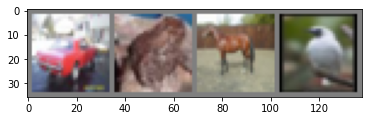

  car  frog horse  bird


In [4]:
#hiển thị hình ảnh bằng matplotlib
import matplotlib.pyplot as plt
import numpy as np
#functions to show an image
def imshow(img):
    img = img/2+0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
#get some random training imgs
dataiter = iter(trainloader)
images, labels = dataiter.next()
#show imgs
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
print(type(trainloader))
print(images.shape)


<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([4, 3, 32, 32])


Xác định 1 mạng neural

In [ ]:
# #define the convnet
# model = Sequential()
# # CONV => RELU => CONV => RELU => POOL => DROPOUT
# model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))


# # CONV => RELU => CONV => RELU => POOL => DROPOUT
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # FLATTERN => DENSE => RELU => DROPOUT
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# # a softmax classifier
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# model.summary()
# m = nn.Dropout(p=0.2)

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F


# class Net_dropout(nn.Module):
#     def __init__(self, dropout=0.25):
#         super(Net_dropout, self).__init__()


#         # Kiến trúc keras tương ứng
#         # CONV => RELU => CONV => RELU => POOL => DROPOUT
# # model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
# # # model.add(Activation('relu'))
# # model.add(Conv2D(32, (3, 3)))
# # # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
#         #3*32*32 -> 32*32*32
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=2)
        
#         # self.dropout1 = nn.Dropout(p=dropout)        
#         #32*32*32 -> 30*30*32
#         self.conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
#         # 30*30*32 -> 15*15*32
#         self.pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=2)
#         #16*16*32 -> 16*16*32
#         self.dropout1 = nn.Dropout(p=dropout)



# # Kiến trúc keras tương ứng
# # model.add(Conv2D(64, (3, 3), padding='same'))
# # model.add(Activation('relu'))
# # model.add(Conv2D(64, (3, 3)))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
#         # 15*15*32 -> 15*15*64
#         self.conv3 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=2)
#         # 15*15*64 -> 13*13*64
#         self.conv4 = nn.Conv2d(64, 64, 3, stride=1, padding=1)
#         #13*13*64 -> 6*6*64
#         self.pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=2)
#         # 6*6*64 -> 6*6*64
#         self.dropout2 = nn.Dropout(p=dropout)
     


# # #kiến trúc keras tương ứng
# # # FLATTERN => DENSE => RELU => DROPOUT
# # model.add(Flatten())
# # model.add(Dense(512))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# # # a softmax classifier
# # model.add(Dense(num_classes))
# # model.add(Activation('softmax'))

#         #16*16*64 -> 8*8*64
#         self.fc1 = nn.Linear(6*6*64, 512)
#         self.dropout3 = nn.Dropout(p=dropout)
#         self.fc3 = nn.Linear(512, 10)
#         # self.dropout4 = nn.Dropout(p=dropout)
#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = self.conv2()

#     def forward(self, x):
#         x = self.dropout1(self.conv1(x))
#         x = self.pool1(F.relu(x))
#         x = self.dropout2(self.conv2(x))
#         x = self.pool2(F.relu(x))
#         x = x.view(-1, self.num_flat_features(x)) 
#         #self.num_flat_features(x) = 8*8*64 here.
#         #-1 means: get the rest a row (in this case is 16 mini-batches)
#         #pytorch nn only takes mini-batch as the input
        
#         x = F.relu(self.fc1(x))
#         x = self.ju(x)
#         x = F.relu(self.fc2(x))
#         x = self.dropout4(x)
#         x = self.fc3(x)
#         return x
    
#     def num_flat_features(self, x):
#         size = x.size()[1:] # all dimensions except the batch dimension
#         num_features = 1
#         for s in size:
#             num_features *= s
#         return num_features

# ###
# # Keras structure
# #def build_basic_net(model, dropout=0.2):
# #    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', strides=1,
# #                     input_shape=X_train.shape[1:], activation='relu'))
# #    model.add(Dropout(dropout))
# #    model.add(MaxPooling2D(pool_size=(2, 2)))
# #    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', strides=1,
# #                     input_shape=X_train.shape[1:], activation='relu'))
# #    model.add(Dropout(dropout))
# #    model.add(MaxPooling2D(pool_size=(2, 2)))
# #    
# #    model.add(Flatten())
# #    model.add(Dense(1024, activation='relu'))
# #    model.add(Dropout(dropout))
# #    model.add(Dense(512, activation='relu'))
# #    model.add(Dropout(dropout))
# #    model.add(Dense(10,activation='softmax'))
        


       
# #display net architecture
# print(Net_dropout())  


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #conv2d (input chanels, output chanels, kernel)
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Xác định hàm optimizer và hàm loss funtion 
- Hàm loss function: nn.CrossEntropyLoss()
- optimizer: stochastic gradient descent của module torch.optim



In [9]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr= 0.001, momentum = 0.1)

Huấn luyện model
- Khởi tạp 1 loop gồm 2 epoch, mỗi epochs sẽ truyền toàn bộ data interator như đầu vào của mạng nơ-ron
- Bên trong mỗi
 output của mô hình.
hàm loss function.
phương pháp optimize.
thực hiện quá trình feed forward.

In [12]:
for epoch in range(2):
    running_loss = 0.0 
    for i, data in enumerate(trainloader, 0):
    # nhận dữ liệu đầu vào = inputs, labels
        inputs, labels = data
    #zero the paramter gradient
        optimizer.zero_grad()
    #forward + backward + optimizer
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    #print statisctics
        running_loss += loss.item()
    if i% 2000 == 1999: 
        #print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch+1, i+1, running_loss/2000))
        running_loss =0.0
print('Finished Training')

Finished Training


 Kiểm tra network trên tập data test
Như vậy chúng ta đã hoàn thành 2 lượt huấn luyện dữ liệu trên toàn bộ tập training dataset. Sau đây chúng ta cần kiểm tra xem kết quả mô hình sau huấn luyện như thế nào trên dữ liệu test dataset.

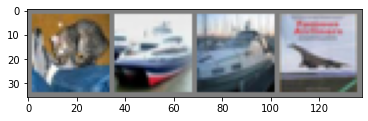

GroundTruth:   cat  ship  ship plane


In [13]:
# Hiển thị một vài dữ liệu
# Sử dụng hàm iter để biến testloader thành 1 iterator, từ đó có thể lấy các giá trị tiếp theo.
dataiter = iter(testloader)
images, labels = dataiter.next()

# print image
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: {}'.format(' '.join('%5s' % classes[labels[j]] for j in range(4))))


Khác với tensorflow khi dự báo chúng ta cần phải sử dụng hàm predict. Để dự báo nhãn cho tập data test chúng ta chỉ cần truyền raw data vào object net. Mô hình sẽ tự động thực hiện một quá trình lan truyền thuận và tính ra phân phối xác xuất ở đầu ra.

In [14]:
outputs = net(images)
print(type(outputs))
print(outputs.shape)

<class 'torch.Tensor'>
torch.Size([4, 10])


Lấy ra nhãn dự báo dựa vào xác xuất lớn nhất của phân phối xác xuất đầu ra.

In [15]:
_,  predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    cat  ship  ship  ship


Dự báo trên 4 quan sát đầu tiên cho thấy đúng 3 sai 1. Kiểm tra trên toàn bộ các quan sát.

In [16]:
print(type(labels))
print(type(images))

print(labels.shape)
print(images.shape)

torch.Size([4])
torch.Size([4, 3, 32, 32])

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([4])
torch.Size([4, 3, 32, 32])
Accuracy of the network on the 10000 test images: 45 %


Kiểm tra mức độ chính xác trên từng class một.

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
# để ngăn tensor lưu lại lịch sử (và sử dụng memory), có thể bao quanh code block triển khai tensor với hàm** with torch.no_grad()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 35 %
Accuracy of   car : 51 %
Accuracy of  bird : 31 %
Accuracy of   cat : 23 %
Accuracy of  deer : 21 %
Accuracy of   dog : 34 %
Accuracy of  frog : 66 %
Accuracy of horse : 61 %
Accuracy of  ship : 72 %
Accuracy of truck : 56 %


 Huấn luyện model trên GPU

Kiểm tra xem cuda device tồn tại chưa

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [19]:
net.to(device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
print(data[0].shape)
print(data[1].shape)

torch.Size([4, 3, 32, 32])
torch.Size([4])


In [22]:
inputs, labels = data[0].to(device), data[1].to(device)